In [5]:
import numpy as np

# Load the Iris dataset (for demonstration purposes)
def load_iris():
    from sklearn.datasets import load_iris
    iris = load_iris()
    X, y = iris.data, iris.target
    return X, y

# Split the dataset into training and testing sets
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = X.shape[0]
    test_size = int(test_size * num_samples)

    indices = np.random.permutation(num_samples)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Naive Bayes classifier
class NaiveBayesClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = np.zeros(len(self.classes))
        self.means = []
        self.stds = []

        for c in self.classes:
            X_c = X[y == c]
            self.priors[c] = len(X_c) / len(X)
            self.means.append(X_c.mean(axis=0))
            self.stds.append(X_c.std(axis=0))

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for i, c in enumerate(self.classes):
            prior = np.log(self.priors[c])
            likelihood = np.sum(np.log(self._pdf(i, x)))
            posterior = prior + likelihood
            posteriors.append(posterior)

        return np.argmax(posteriors)

    def _pdf(self, class_index, x):
        mean = self.means[class_index]
        std = self.stds[class_index]
        numerator = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        denominator = np.sqrt(2 * np.pi * std ** 2)
        return numerator / denominator

# Bagging with Naive Bayes
class BaggingNaiveBayes:
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_subset, y_subset = X[indices], y[indices]
            model = NaiveBayesClassifier()
            model.fit(X_subset, y_subset)
            self.models.append(model)

    def predict(self, X):
        predictions = [model.predict(X) for model in self.models]
        ensemble_predictions = np.array(predictions).T
        majority_vote = [np.bincount(row).argmax() for row in ensemble_predictions]
        return majority_vote

# Load data and split into train and test sets
X, y = load_iris()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the BaggingNaiveBayes classifier
n_estimators = 10
bagging_nb = BaggingNaiveBayes(n_estimators)
bagging_nb.fit(X_train, y_train)

# Make predictions on the test set and calculate accuracy
y_pred = bagging_nb.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Bagging Naive Bayes Accuracy: {accuracy:.2f}")
# Calculate precision, recall, F1-score, and support for each class
def calculate_metrics(y_true, y_pred, class_label):
    true_positive = np.sum((y_true == class_label) & (y_pred == class_label))
    false_positive = np.sum((y_true != class_label) & (y_pred == class_label))
    false_negative = np.sum((y_true == class_label) & (y_pred != class_label))
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)
    support = np.sum(y_true == class_label)
    return precision, recall, f1_score, support

unique_classes = np.unique(y_test)
print("\nClassification Report:")
for class_label in unique_classes:
    precision, recall, f1_score, support = calculate_metrics(y_test, y_pred, class_label)
    print(f"\nClass {class_label} Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1_score:.2f}")
    print(f"Support: {support}")



Bagging Naive Bayes Accuracy: 0.96

Classification Report:

Class 0 Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Support: 19

Class 1 Metrics:
Precision: 1.00
Recall: 0.85
F1-Score: 0.92
Support: 13

Class 2 Metrics:
Precision: 0.87
Recall: 1.00
F1-Score: 0.93
Support: 13


In [ ]:
#Gradient Boosting

Mean Squared Error: 0.23


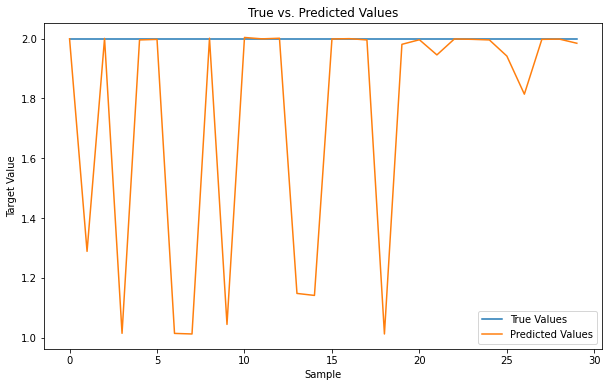

In [8]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training and testing set
split_ratio = 0.8 #(80% for training)
split_index = int(len(X) * split_ratio)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# Define the number of trees for Gradient Boosting
n_trees = 100
learning_rate = 0.1

# Initialize the predictions with the mean of the target values
y_train_pred = np.full(y_train.shape, np.mean(y_train, dtype=np.float64))
y_test_pred = np.full(y_test.shape, np.mean(y_train, dtype=np.float64))

# Gradient Boosting
for i in range(n_trees):
    # Calculate the negative gradient (residuals) for both training and test sets
    train_residuals = y_train - y_train_pred
    test_residuals = y_test - y_test_pred

    # Train a Decision Tree on the training residuals
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(X_train, train_residuals)

    # Predict the residuals using the trained tree for both sets
    train_tree_pred = tree.predict(X_train)
    test_tree_pred = tree.predict(X_test)

    # Update the predictions with a fraction of the tree's predictions
    y_train_pred += learning_rate * train_tree_pred
    y_test_pred += learning_rate * test_tree_pred

# Calculate the mean squared error on the test set
mse = np.mean((y_test - y_test_pred) ** 2)
print(f"Mean Squared Error: {mse:.2f}")

# Optionally, you can also plot the predicted and true values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="True Values")
plt.plot(y_test_pred, label="Predicted Values")
plt.legend()
plt.xlabel("Sample")
plt.ylabel("Target Value")
plt.title("True vs. Predicted Values")
plt.show()


Mean Squared Error: 2.08


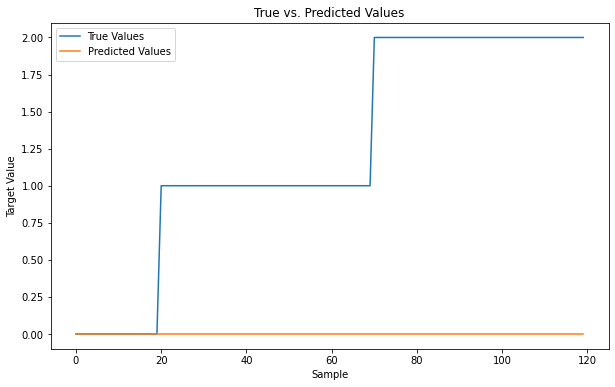

In [13]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training and testing set
split_ratio = 0.2
split_index = int(len(X) * split_ratio)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# Define the number of trees for Gradient Boosting
n_trees = 50
learning_rate = 0.1

# Initialize the predictions with the mean of the target values
y_train_pred = np.full(y_train.shape, np.mean(y_train, dtype=np.float64))
y_test_pred = np.full(y_test.shape, np.mean(y_train, dtype=np.float64))

# Gradient Boosting
for i in range(n_trees):
    # Calculate the negative gradient (residuals) for both training and test sets
    train_residuals = y_train - y_train_pred
    test_residuals = y_test - y_test_pred

    # Train a Decision Tree on the training residuals
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(X_train, train_residuals)

    # Predict the residuals using the trained tree for both sets
    train_tree_pred = tree.predict(X_train)
    test_tree_pred = tree.predict(X_test)

    # Update the predictions with a fraction of the tree's predictions
    y_train_pred += learning_rate * train_tree_pred
    y_test_pred += learning_rate * test_tree_pred

# Calculate the mean squared error on the test set
mse = np.mean((y_test - y_test_pred) ** 2)
print(f"Mean Squared Error: {mse:.2f}")

# Optionally, you can also plot the predicted and true values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="True Values")
plt.plot(y_test_pred, label="Predicted Values")
plt.legend()
plt.xlabel("Sample")
plt.ylabel("Target Value")
plt.title("True vs. Predicted Values")
plt.show()
